# Insurance dataset

### Columns

age: age of primary beneficiary
<br><br>
sex: insurance contractor gender, female, male
<br><br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
<br><br>
children: Number of children covered by health insurance / Number of dependents
<br><br>
smoker: Smoking or not
<br><br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
<br><br>
charges: Individual medical costs billed by health insurance 

# Tasks

### Load dataset

In [4]:
import pandas as pd
data = pd.read_csv('Dataset.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,52.0,female,30.780,1,no,northeast,10797.33620
1,23.0,male,23.845,0,no,northeast,2395.17155
2,NaN,NaN,45.000,0,yes,southwest,12612.37100
3,56.0,male,40.300,0,no,southwest,10602.38500
4,56.0,male,40.300,0,no,southwest,10602.38500


### Drop dublicates and null values - 10 points

In [5]:
data = data.dropna()
data = data.drop_duplicates()

data.head()

,age,sex,bmi,children,smoker,region,charges
0,52.0,female,30.780,1,no,northeast,10797.33620
1,23.0,male,23.845,0,no,northeast,2395.17155
3,56.0,male,40.300,0,no,southwest,10602.38500
7,60.0,female,25.840,0,no,northwest,28923.13692
8,25.0,male,26.220,0,no,northeast,2721.32080


### Use LabelEncoder() to transform values from 'sex', 'smoker','region' columns - 10 points

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,52.0,0,30.780,1,0,0,10797.33620
1,23.0,1,23.845,0,0,0,2395.17155
3,56.0,1,40.300,0,0,3,10602.38500
7,60.0,0,25.840,0,0,1,28923.13692
8,25.0,1,26.220,0,0,0,2721.32080


### Visualization Tasks - 40 points

1.Plot a histogram to show the distribution of ages in the dataset.

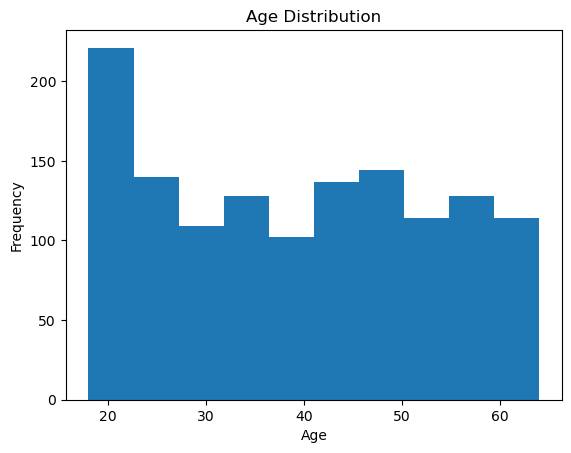

In [7]:
import matplotlib.pyplot as plt
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.hist(data["age"])
plt.show()

2.Create a pie chart to represent the proportion of males and females in the dataset

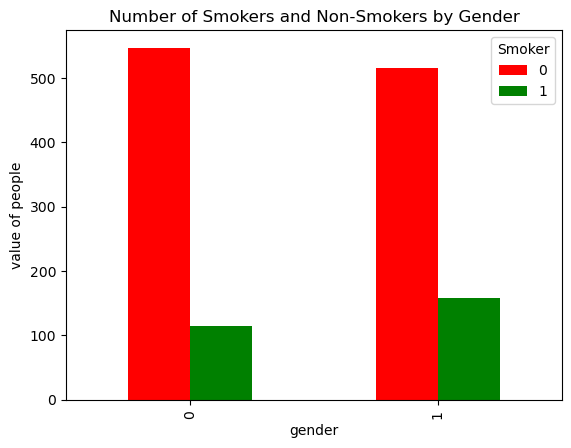

In [14]:
cnt = data.groupby(["sex", "smoker"]).size().unstack().fillna(0)
cnt.plot(kind="bar", color=["red","green"])
plt.xlabel("gender")
plt.ylabel("value of people")
plt.title("Number of Smokers and Non-Smokers by Gender")
plt.legend(title="Smoker")
plt.show()

3.Create a bar plot showing the number of smokers and non-smokers, categorized by gender.

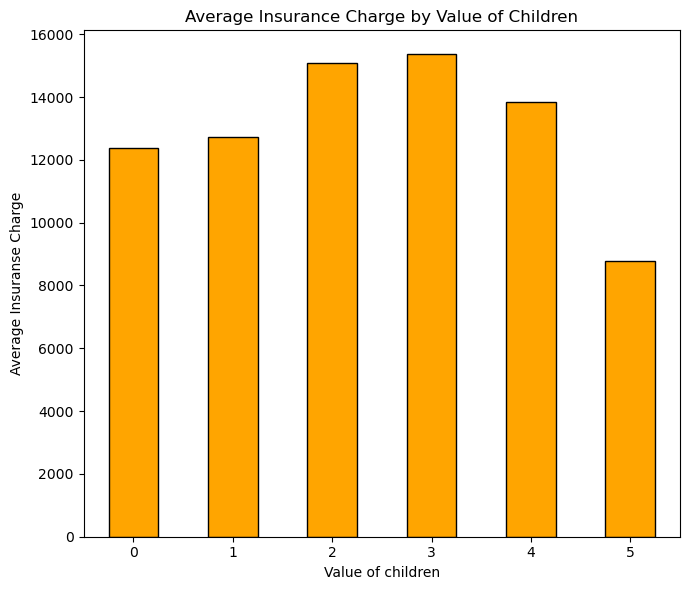

In [9]:
average_children = data.groupby("children")["charges"].mean()
plt.figure(figsize=(7, 6))
average_children.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Average Insurance Charge by Value of Children")
plt.xlabel("Value of children")
plt.ylabel("Average Insuranse Charge")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

4.Create a bar plot showing the average insurance charges for different numbers of children.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = data.drop("charges", axis=1)
y = data["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

### Train model on Linear Regression ('Chargres'  column is target) - 20 points

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
y_ans = reg.predict(x_test)
mean = mean_squared_error(y_test, y_ans)
accuracy = r2_score(y_test, y_ans)
print("Accuracy is: ", accuracy*100)

Accuracy is:  80.60406129485158


### Model Evaluation - 20 points